In [1]:
import os
import pandas as pd
import numpy as np

#get rid of future warnings with seaborn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [2]:
# look at the file name
names = os.listdir('input');
names

['.ipynb_checkpoints', 'Bank_Personal_Loan_Modelling.xlsx', 'random_file.png']

In [3]:
#get the path to the file
path = 'input/' + names[1]
path

'input/Bank_Personal_Loan_Modelling.xlsx'

In [65]:
master = pd.read_excel(path, 'Data')

In [66]:
master.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Variables definition


> - **ID** - Customer ID 
> - **Age** - Customer's age in completed years 
> - **Experience** - #years of professional experience 
> - **Income** - Annual income of the customer - in thousands usd 
> - **ZIPCode** - Home Address ZIP code. 
> - **Family** - Family size of the customer 
> - **CCAvg** - Avg. spending on credit cards per month - in thousands usd 
> - **Education** - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 
> - **Mortgage** - Value of house mortgage if any - in thousands usd  
> - **Personal Loan**  - Did this customer accept the personal loan offered in the last campaign? 
> - **Securities Account** - Does the customer have a securities account with the bank? 
> - **CD Account** - Does the customer have a certificate of deposit (CD) account with the bank? 
> - **Online** - Does the customer use internet banking facilities? 
> - **CreditCard** - Does the customer uses a credit card issued by UniversalBank?

In [67]:
#for more convinient - reposition "Personal Loan"  column since it is our target column for research
a = master['Personal Loan']
master.drop('Personal Loan', axis = 1, inplace = True)
master['Personal Loan'] = a

In [68]:
master.head(1)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0


# <br><br>

## Assess Data

In [69]:
df = master.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


> **Observation**
> - No null values
> - No missing values
> - Columns "ID", "ZIP Code", are nominal variables. Should be in 'str' type

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


> **Observation**
> - Column "Experience" has some negative value. Need to fix
> - Binary variables "Personal Loan", "CreditCard", "Online", "CD Account", "Securities Account" has clean data
> - Ordinary Cat variables "Family" and "Education" are clean too  

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

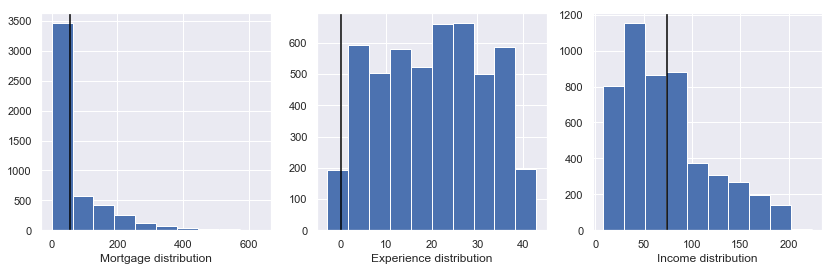

In [11]:
#cols = ['Experience', 'Mortgage']
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize = (14,4))

ax0.hist(df.Mortgage)
ax0.set_xlabel('Mortgage distribution')
ax0.axvline(df.Mortgage.mean(), color = "black")

ax1.hist(df.Experience)
ax1.set_xlabel('Experience distribution')
ax1.axvline(0, color = "black");

ax2.hist(df.Income)
ax2.set_xlabel('Income distribution')
ax2.axvline(df.Income.mean(), color = "black");

### Summary Assess Data
> - Columns "ID", "ZIP Code", are nominal variables. Should be in 'str' type
> - Column "Experience" has some negative value. Need to fix

No bad tidiness issues


# <br>

## Clean Data

#### Define

Columns "ID", "ZIP Code", are nominal variables

#### Code

In [12]:
df['ID'] = df['ID'].astype('str')

#### Test

In [13]:
df[['ID', 'ZIP Code']].dtypes

ID          object
ZIP Code     int64
dtype: object

# <br>

#### Define

Column "Experience" has some negative value

#### Code

In [14]:
#check the ammount of negative values
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

##### Lets find the interval variable with strong correlation with 'Experience'

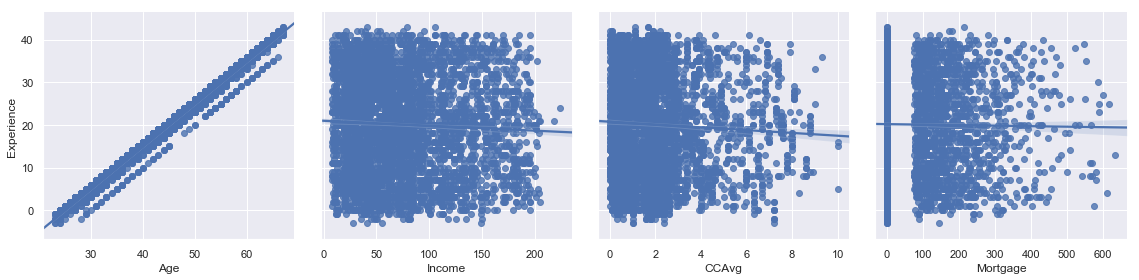

In [15]:
ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(df, y_vars = 'Experience', x_vars = ncol, height = 4)
grid.map(sns.regplot);

'Age' has a very strong correlation with 'Experience

Get the subset of 'Age' data with negative values in 'Experience

In [16]:
df[df['Experience'] < 0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

**Observation:**

The subset of each age with negative values in 'Experience' is definitely small. 

**Decision:**
We can replace each negative 'Experience' value with the mean of positive 'Experience' value associated with the particular 'Age' value

<br>
Get a list of 'Age' values where we found some negative values in 'Experience'

In [17]:
ages = df[df['Experience'] < 0]['Age'].unique().tolist()
ages

[25, 24, 28, 23, 29, 26]

Get indexes of negative values in 'Experience'

In [18]:
indexes = df[df['Experience'] < 0].index.tolist()

Replace nagative 'Experience' values with the means

In [19]:
for i in indexes:
    for x in ages:
        df.loc[i,'Experience'] = df[(df.Age == x) & (df.Experience > 0)].Experience.mean()

#### Test

In [20]:
df[df['Experience'] < 0]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [21]:
df.Experience.describe()

count    5000.000000
mean       20.135743
std        11.413140
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

# <br>
All Data is clean and we can start Analysis
<br> 

# Analysis

### Questions

> - Is there some correlation between personal characteristics and the fact that person obtained Personal Loan (Loan Fact)? If so:
> - What are those Main Characteristics that has a higher correlation with Loan Fact and what the strength of correlation?
> - What the Segments of Main Characteristics, that has a higher ratio of conversion customers into the Personal Loaners?
> - What is the sample of Data with persons from Main Segments.
> - What is the probability of person obtain Personal Loan if his/her characteristics come from Main Segments?

###  Is there some correlation between personal characteristics and the fact that person obtained Personal Loan?

Since our control variable "Personal Loan" is a categorical variable, we want to use Logistic Regression to find the correlations if any exist. As a Null Hypothesis, we assume  that variable **does not** correlate with "Personal Loan"

In [22]:
import statsmodels.api as sm

In [23]:
# create a column with an intercept
df['intercept'] = 1

In [24]:
#exclude column "ID" from analysis
cols = df.columns.drop(['ID', 'Personal Loan']).tolist()

In [25]:
# create and fit the logistic model
log_mod = sm.Logit(df['Personal Loan'], df[cols]).fit()

Optimization terminated successfully.
         Current function value: 0.128517
         Iterations 9


In [26]:
# check the summary
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4987
Method:                           MLE   Df Model:                           12
Date:                Tue, 26 Mar 2019   Pseudo R-squ.:                  0.5936
Time:                        14:13:01   Log-Likelihood:                -642.58
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0214      0.059     -0.364      0.716      -0.137       0.094
Experience             0.0317      0.059      0.540      0.589      -0.083       0.147
Income                 0.0546      0.003     20.859      0.000       0.050       0.060
ZIP Code           -4.276e-06   4.07e-05     -0.105      0.916   -8.41e-05    7.55e-05
Family                 0.6952      0.074      9.355      0.000       0.550       0.841
CCAvg                  0.1239      0.040      3.126      0.002       0.046       0.202
Education              1.7251      0.115     15.031      0.000       1.500       1.950
Mortgage               0.0005      0.001      0.834      0.404      -0.001       0.002
Securities Account    -0.9337      0.286     -3.270      0.001      -1.493      -0.374
CD Account             3.8291      0.324     11.814      0.000       3.194       4.464
Online                -0.6748      0.157     -4.297      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.461      0.000      -1.522      -0.718
intercept            -12.5944      4.098     -3.073      0.002     -20.626      -4.563
======================================================================================
"""

In [58]:
#filter columns with P-values less then 0.05
colmn = []
for i in cols:
    if log_mod.pvalues[i] < 0.05:
        colmn.append(i)
    else:
        continue

In [59]:
colmn

['Income',
 'Family',
 'CCAvg',
 'Education',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'intercept']

# <br>

### Conclusion

There are some correlations between Personal Loan and following variables:

> - 'Income',
> -  'Family',
> -  'CCAvg',
> -  'Education',
> -  'Securities Account',
> -  'CD Account',
> -  'Online',
> -  'CreditCard'

Lets find the strength of correlations

# <br>

### What are those Main Characteristics that has a higher correlation with Loan Fact and what the strength of correlation?

In [29]:
#diveid list by, binary vars, categorical vars, interval vars


bin_colmn = ['Securities Account', 'CD Account', 'Online','CreditCard']

# for 
cat_colmn = ['Family','Education']

#for his plots
int_colmn = ['Income', 'CCAvg'] 

Let's see the charts with just this vars

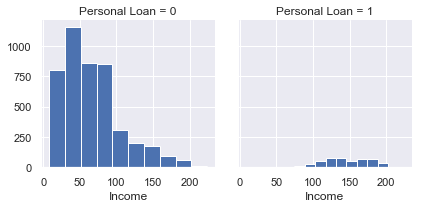

In [30]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Income');

**Observation**
Most Loaners has income more than 100K and less than 200K

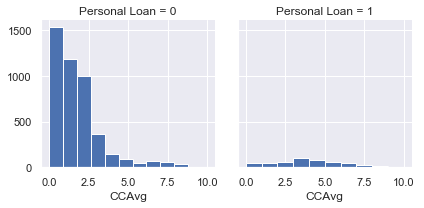

In [42]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'CCAvg');

**Observation**
Most Loaners has average credit card spending arount 3K

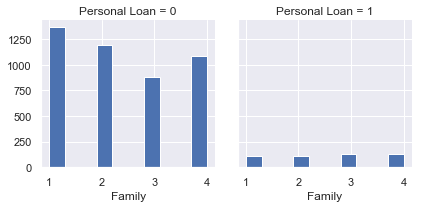

In [43]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Family');

**Observation**
Most Loaners has family with 3 and 4 people

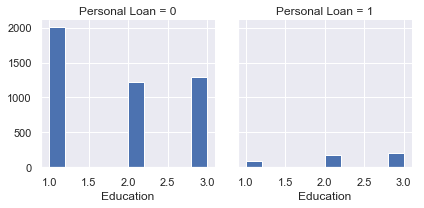

In [56]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Education');

**Observation**
Most Loaners has 2 and 3 level of Education

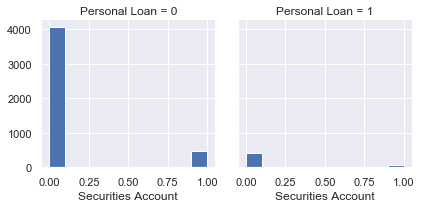

In [35]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Securities Account');

**Observation**
Most Loaners does not have Securities Account with The Bank

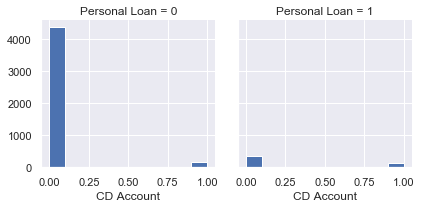

In [36]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'CD Account');

**Observation**
Most Loaners does not have CD Account with The Bank

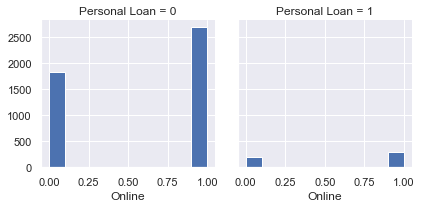

In [37]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Online');

**Observation**
Most Loaners do use online banking

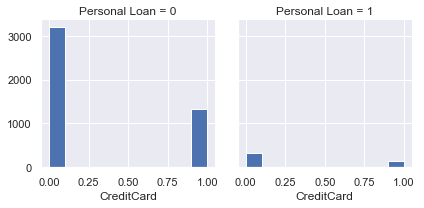

In [38]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'CreditCard');

**Observation**
Most Loaners does not have Credit Card in The Bank

#### Lets see closet to the main variables

In [60]:
log_mod = sm. Logit(df['Personal Loan'], df[colmn]).fit()

Optimization terminated successfully.
         Current function value: 0.128862
         Iterations 9


In [63]:
log_mod.params

Income                 0.054721
Family                 0.690392
CCAvg                  0.113718
Education              1.704119
Securities Account    -0.934619
CD Account             3.853302
Online                -0.667472
CreditCard            -1.123683
intercept            -13.224218
dtype: float64

In [40]:
mfx = log_mod.get_margeff()

In [41]:
mfx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:          Personal Loan
Method:                          dydx
At:                           overall
======================================================================================
                        dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0008      0.002     -0.364      0.716      -0.005       0.003
Experience             0.0012      0.002      0.540      0.589      -0.003       0.005
Income                 0.0020    7.6e-05     26.529      0.000       0.002       0.002
ZIP Code           -1.577e-07    1.5e-06     -0.105      0.916    -3.1e-06    2.79e-06
Family                 0.0256      0.003      9.652      0.000       0.020       0.031
CCAvg                  0.0046      0.001      3.140      0.002       0.002       0.007
Education              0.0636      0.004     16.815      0.000       0.056       0.071
Mortgage            1.705e-05   2.04e-05      0.834      0.404    -2.3e-05    5.71e-05
Securities Account    -0.0344      0.010     -3.286      0.001      -0.055      -0.014
CD Account             0.1412      0.011     12.693      0.000       0.119       0.163
Online                -0.0249      0.006     -4.321      0.000      -0.036      -0.014
CreditCard            -0.0413      0.007     -5.537      0.000      -0.056      -0.027
======================================================================================
"""